# Importamos pandas y numpy
__________________________________________________________________________________________________________________________________________________


In [ ]:

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

__________________________________________________________________________________________________________________________________________________
# Expecificamos ruta y leemos archivos
__________________________________________________________________________________________________________________________________________________


In [ ]:
df_final_demo = r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'
df_final_web_data_pt1 = r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'
df_final_web_data_pt2 = r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'
df_final_experiment_client = r'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'


In [3]:
# Intenta leer el archivo
try:
    df_final_demo = pd.read_csv(df_final_demo, sep=',')  
    df_final_web_data_pt1= pd.read_csv(df_final_web_data_pt1, sep=',')
    df_final_web_data_pt2= pd.read_csv(df_final_web_data_pt2, sep=',')
    df_final_experiment_client= pd.read_csv(df_final_experiment_client, sep=',')
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

__________________________________________________________________________________________________________________________________________________
# LIMPIEZA TABLA FINAL DEMO
__________________________________________________________________________________________________________________________________________________

In [11]:
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [8]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [10]:
# Verificar la cantidad de valores nulos por columna
print(df_final_demo.isnull().sum())

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64


In [ ]:
#Rellenar los valores nulos con la media (o la mediana) de la columna

df_final_demo['clnt_tenure_yr'].fillna(df_final_demo['clnt_tenure_yr'].mean(), inplace=True)
df_final_demo['clnt_tenure_mnth'].fillna(df_final_demo['clnt_tenure_mnth'].mean(), inplace=True)
df_final_demo['clnt_age'].fillna(df_final_demo['clnt_age'].mean(), inplace=True)
df_final_demo['gendr'].fillna(df_final_demo['gendr'].mode()[0], inplace=True) 
df_final_demo['num_accts'].fillna(df_final_demo['num_accts'].mean(), inplace=True)
df_final_demo['bal'].fillna(df_final_demo['bal'].mean(), inplace=True)
df_final_demo['calls_6_mnth'].fillna(df_final_demo['calls_6_mnth'].mean(), inplace=True)
df_final_demo['logons_6_mnth'].fillna(df_final_demo['logons_6_mnth'].mean(), inplace=True)


In [15]:
# Verificar nuevamente los valores nulos
print(df_final_demo.isnull().sum())


client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64


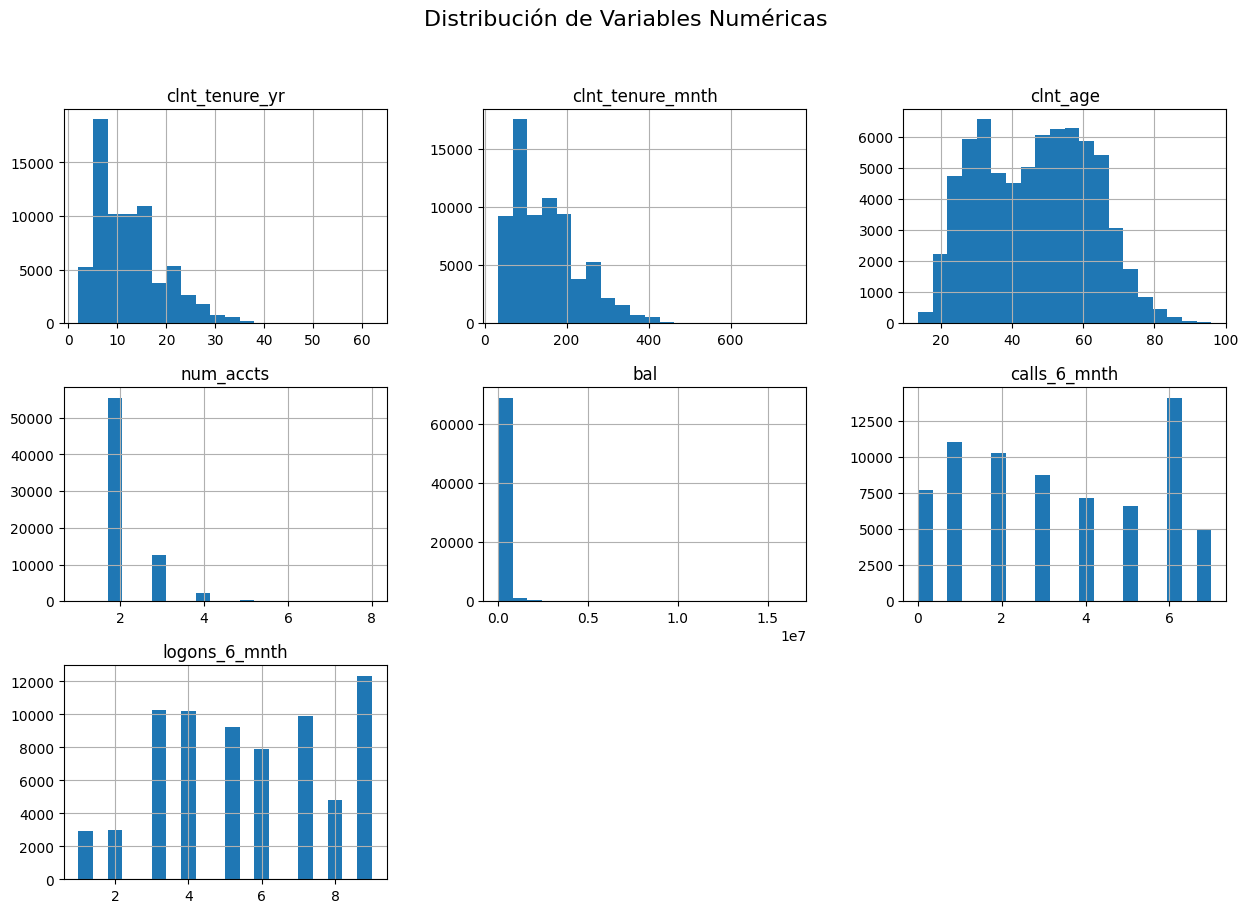

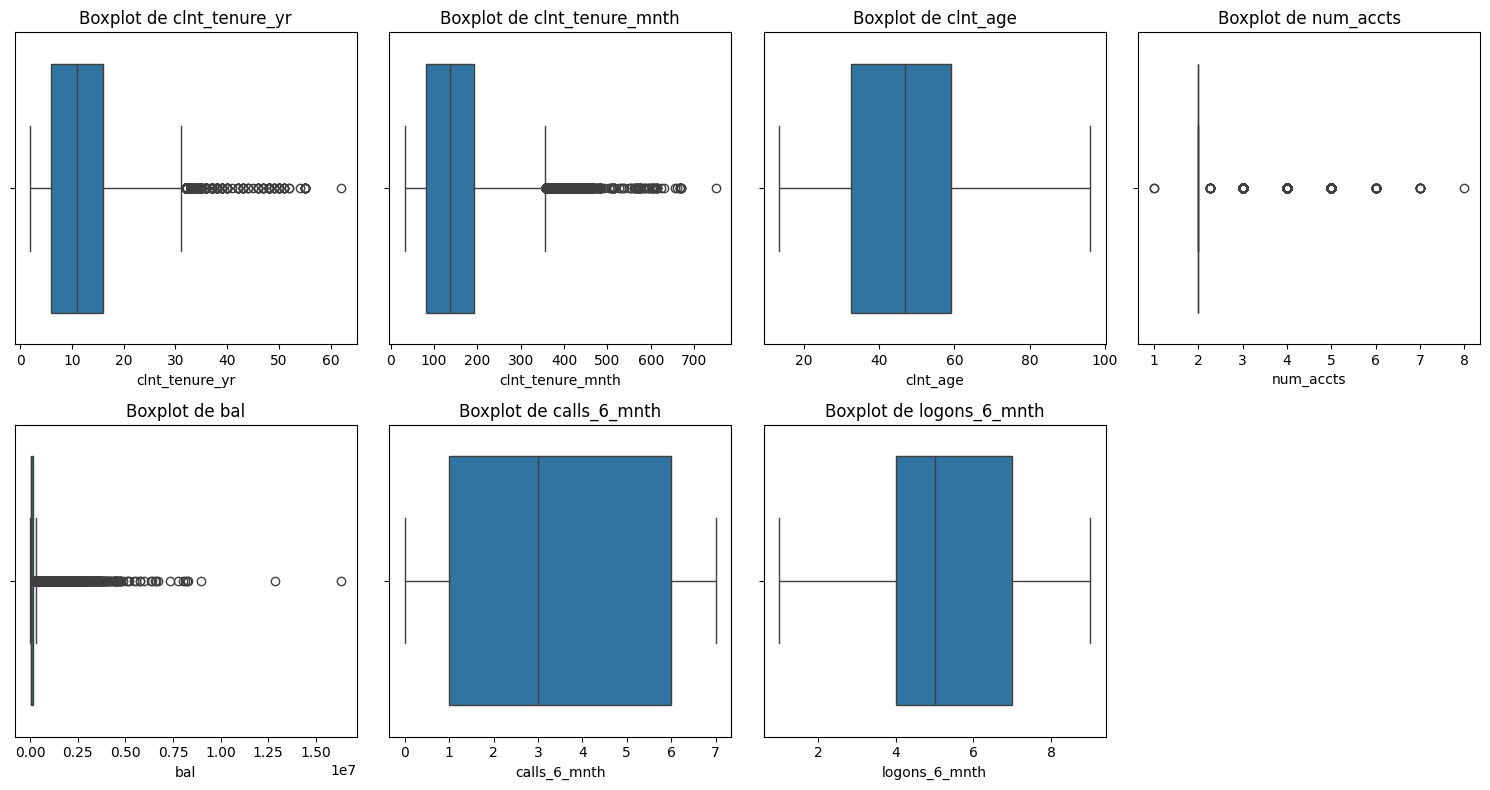

In [16]:
# Visualizar las distribuciones de las variables numéricas
numeric_cols = ['clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']

# Histograma de las columnas numéricas
df_final_demo[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

# Boxplots para detectar posibles valores atípicos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df_final_demo[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

__________________________________________________________________________________________________________________________________________________
# LIMPIEZA TABLA
__________________________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________________________
# LIMPIEZA TABLA
__________________________________________________________________________________________________________________________________________________


__________________________________________________________________________________________________________________________________________________
# LIMPIEZA TABLA
__________________________________________________________________________________________________________________________________________________
